In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [70]:
# Load the data
df = pd.read_csv('../data/benin-malanville.csv')

In [85]:
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,241.780929,167.438880,113.197640,236.536448,228.764065,28.179683,54.487969,2.083517,2.755926,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,482.900000,314.200000,210.300000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1232.000000,950.300000,589.300000,1215.000000,1177.000000,43.800000,100.000000,6.900000,8.700000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,329.821251,261.543051,151.183643,326.810945,316.347871,5.924297,28.073069,1.521833,1.912856,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


In [72]:
#structural summary  for df.info() 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [73]:
#FROM THE ABOVE WE CAN SEE THAT COMMENTS IS EMPTY FOR ALL THE ROWS(100% NULL) 
#AND THE COLUMN IS NOT NEEDED FOR OUR ANALYSIS THEREFORE WE DROP IT
df.drop(columns=['Comments'], inplace=True)
print("Shape after dropping:", df.shape)  # Should show (525600, 18) now

Shape after dropping: (525600, 18)


In [74]:
#check for duplicates
df.duplicated().sum() 

np.int64(0)

In [75]:
# Convert timestamp 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


# Check if timestamp is properly converted
print(df['Timestamp'].dtype)  


datetime64[ns]


In [76]:
#from df.discribe() we can see that the columns DHI, DNI, GHI, HAVE NEGATIVE VALUES WHICH IS NOT POSSIBLE
#THEREFORE WE CAN DROP THE ROWS WITH NEGATIVE VALUES
# Create a mask for negative values
mask = (df[['DHI', 'DNI', 'GHI']] < 0).any(axis=1)
# Drop rows with negative values
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)


In [77]:
from scipy.stats import zscore

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z = df[cols].apply(zscore)

# Identify outliers (|Z| > 3)
outliers = (z.abs() > 3)

# Replace outliers with the median of non-outliers
for col in cols:
    mean_non_outliers = df.loc[~outliers[col], col].mean()  # Median of non-outliers
    df.loc[outliers[col], col] = mean_non_outliers  # Replace outliers with median

# Verify the changes
print("Outliers cleaned. Updated dataset:")
print(df[cols].describe())

Outliers cleaned. Updated dataset:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      241.780929     167.438880     113.197640     236.536448   
std       329.821251     261.543051     151.183643     326.810945   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.800000       0.000000       1.600000       4.500000   
75%       482.900000     314.200000     210.300000     463.600000   
max      1232.000000     950.300000     589.300000    1215.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      228.764065       2.083517       2.755926  
std       316.347871       1.521833       1.912856  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       1.300000  
50%         4.300000     

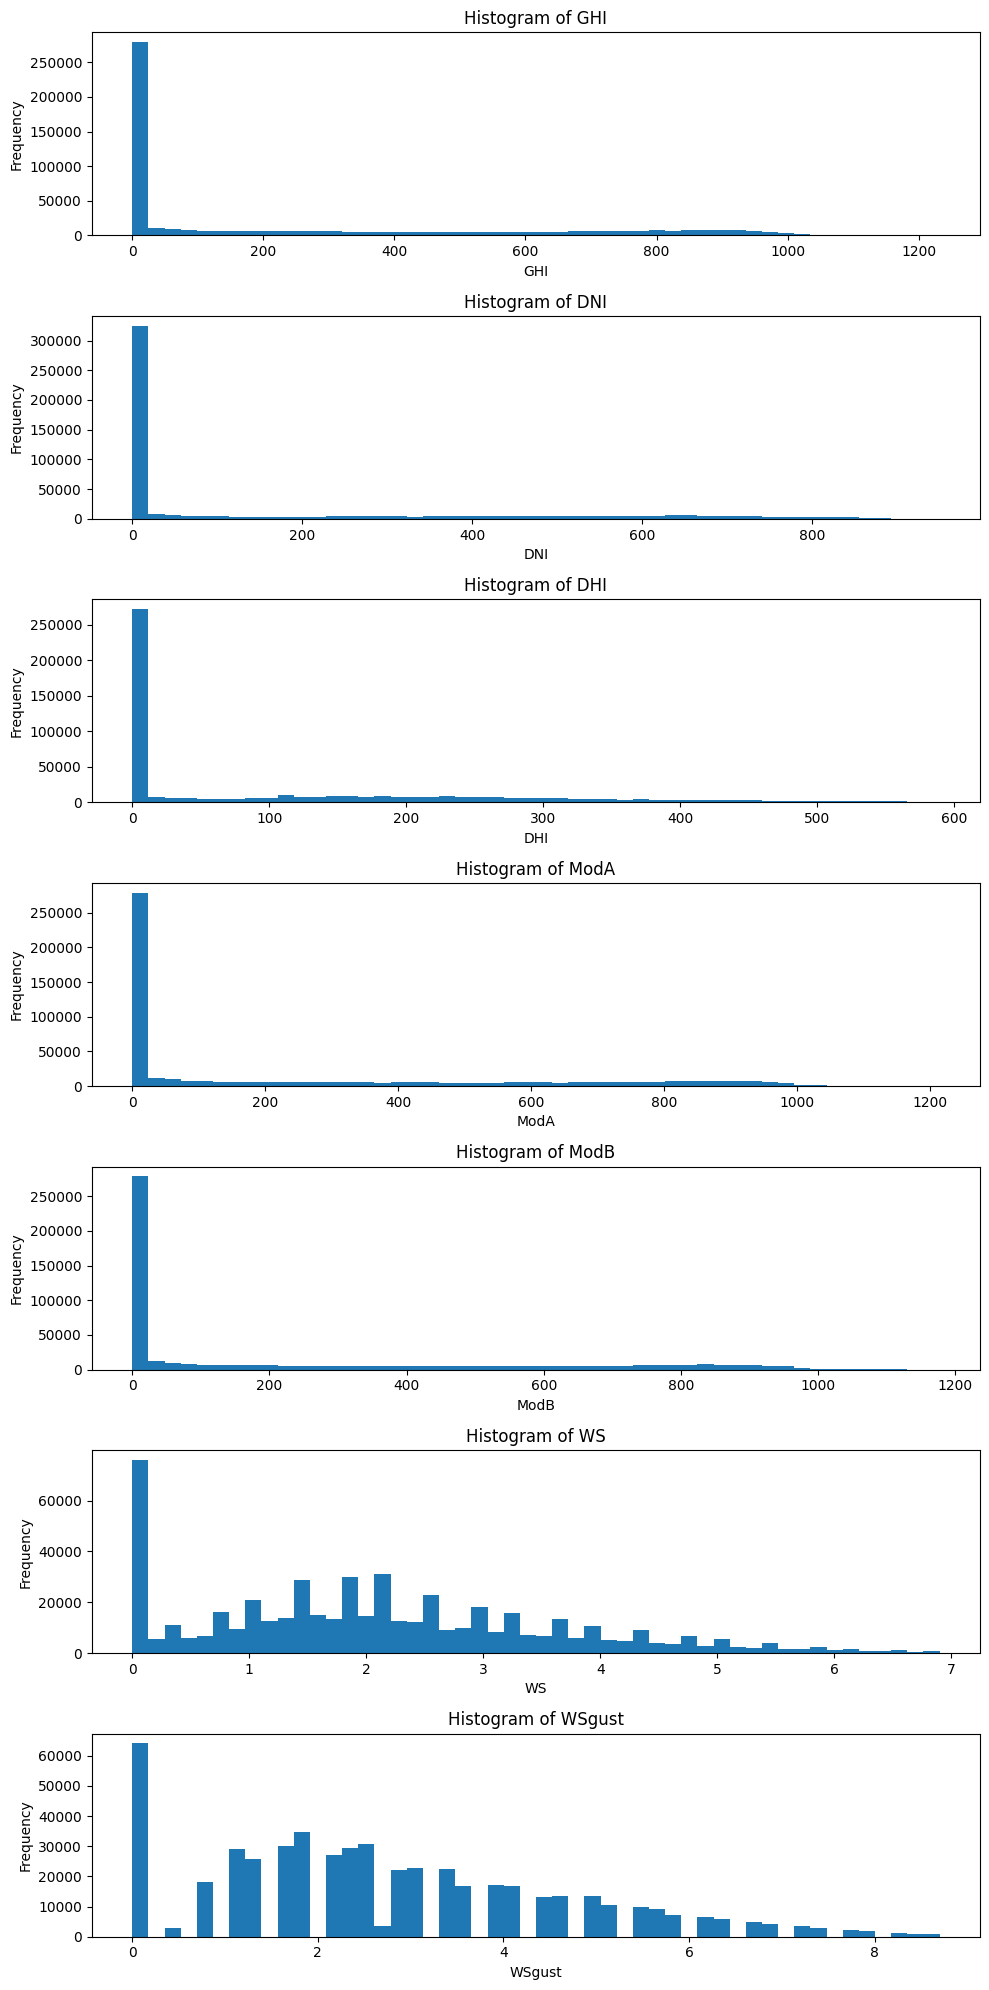

In [78]:
fig, axes = plt.subplots(nrows=len(cols), figsize=(10, 20))  # Adjust size as needed

# Plot histograms for each column
for ax, col in zip(axes, cols):
    df[col].plot.hist(ax=ax, bins=50, title=f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Prevent overlapping labels
plt.show()

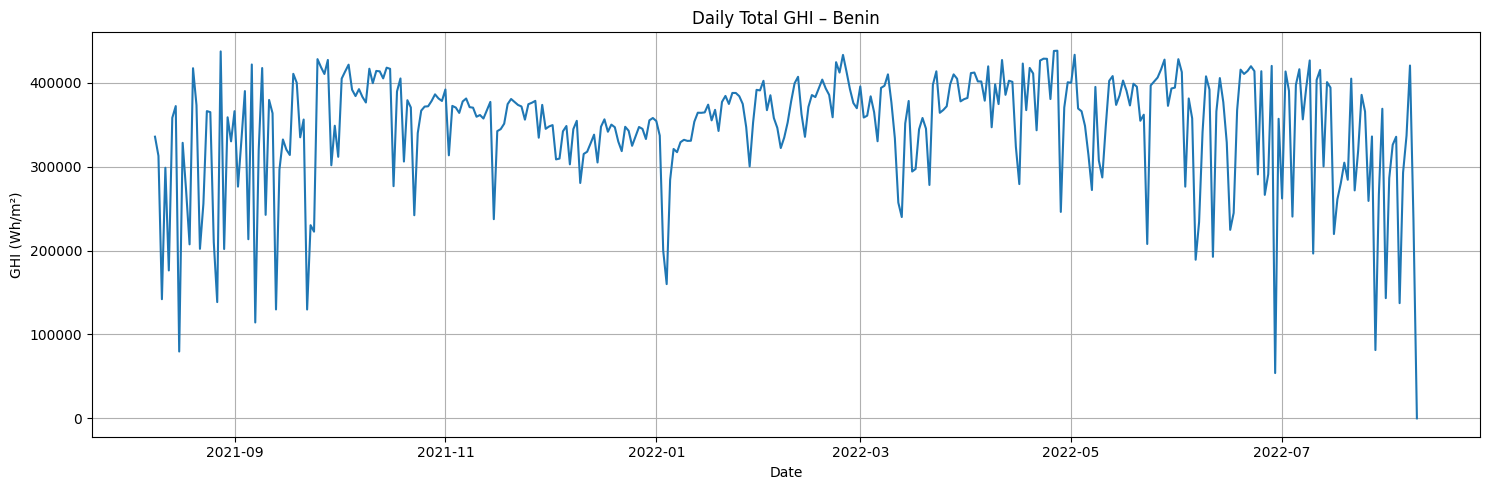

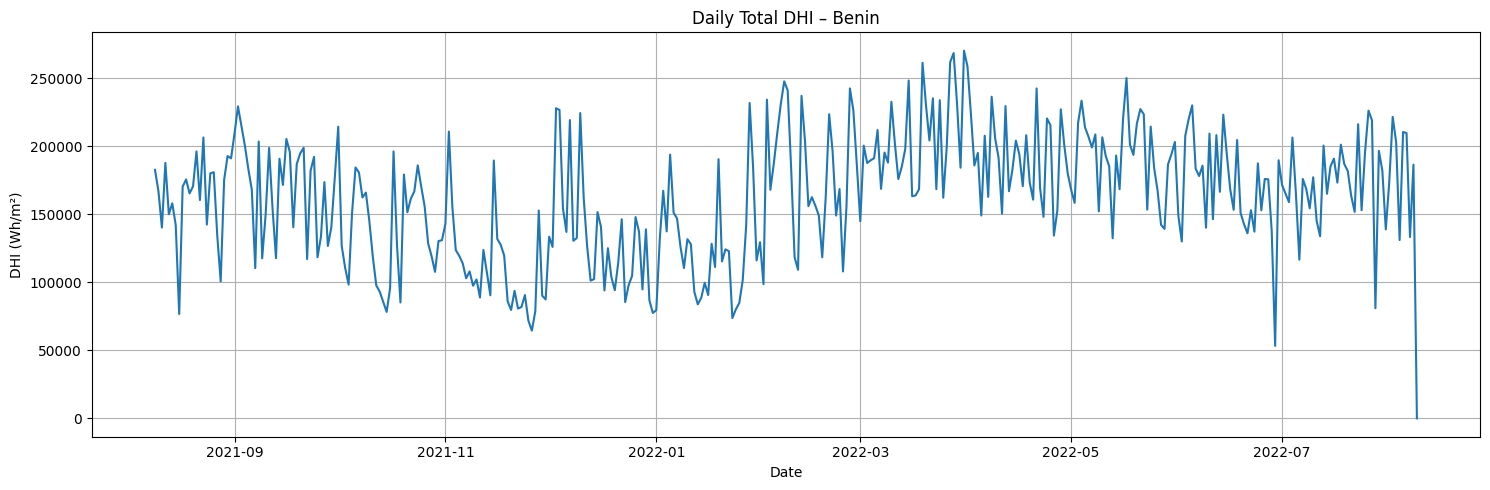

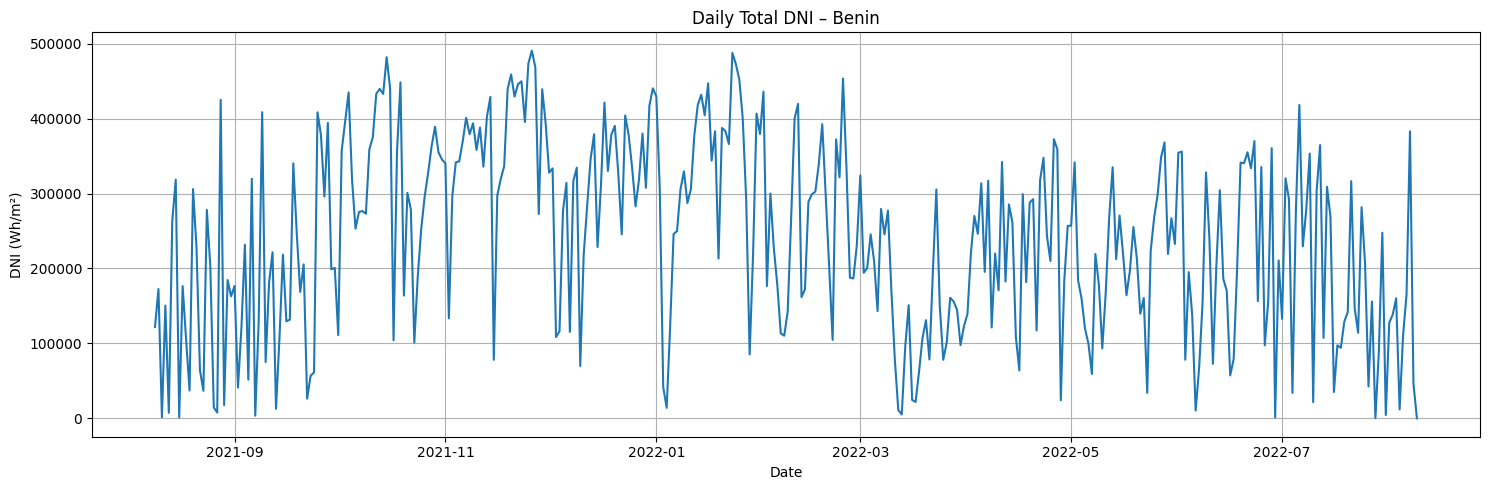

In [79]:


df['Date'] = df['Timestamp'].dt.date
daily_ghi = df.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi.plot()
plt.title("Daily Total GHI – Benin")
plt.xlabel("Date")
plt.ylabel("GHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


daily_dhi = df.groupby('Date')['DHI'].sum()
plt.figure(figsize=(15,5))
daily_dhi.plot()
plt.title("Daily Total DHI – Benin")
plt.xlabel("Date")
plt.ylabel("DHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

Daily_dni = df.groupby('Date')['DNI'].sum()
plt.figure(figsize=(15,5))
Daily_dni.plot()
plt.title("Daily Total DNI – Benin")
plt.xlabel("Date")
plt.ylabel("DNI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

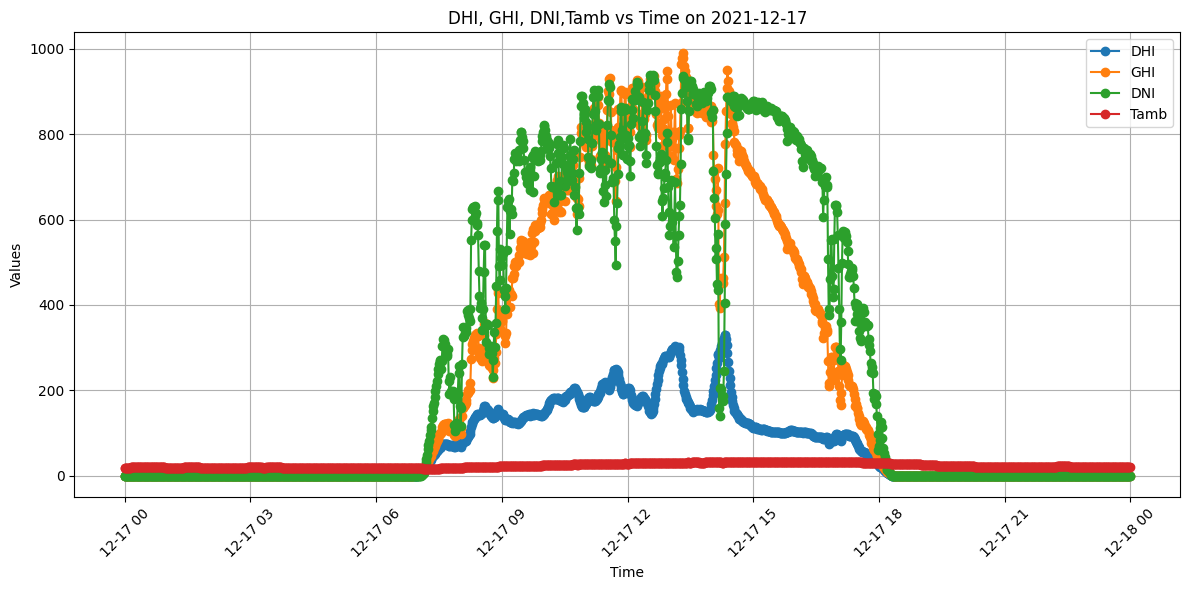

In [80]:
import random

# Select a random day from the dataset
random_day = random.choice(df['Timestamp'].dt.date.unique())

# Filter the data for the selected day
day_data = df[df['Timestamp'].dt.date == random_day]

# Plot DHI, GHI, and DNI against time
plt.figure(figsize=(12, 6))
plt.plot(day_data['Timestamp'], day_data['DHI'], label='DHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['GHI'], label='GHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['DNI'], label='DNI', marker='o')
plt.plot(day_data['Timestamp'], day_data['Tamb'], label='Tamb', marker='o')


plt.title(f"DHI, GHI, DNI,Tamb vs Time on {random_day}")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

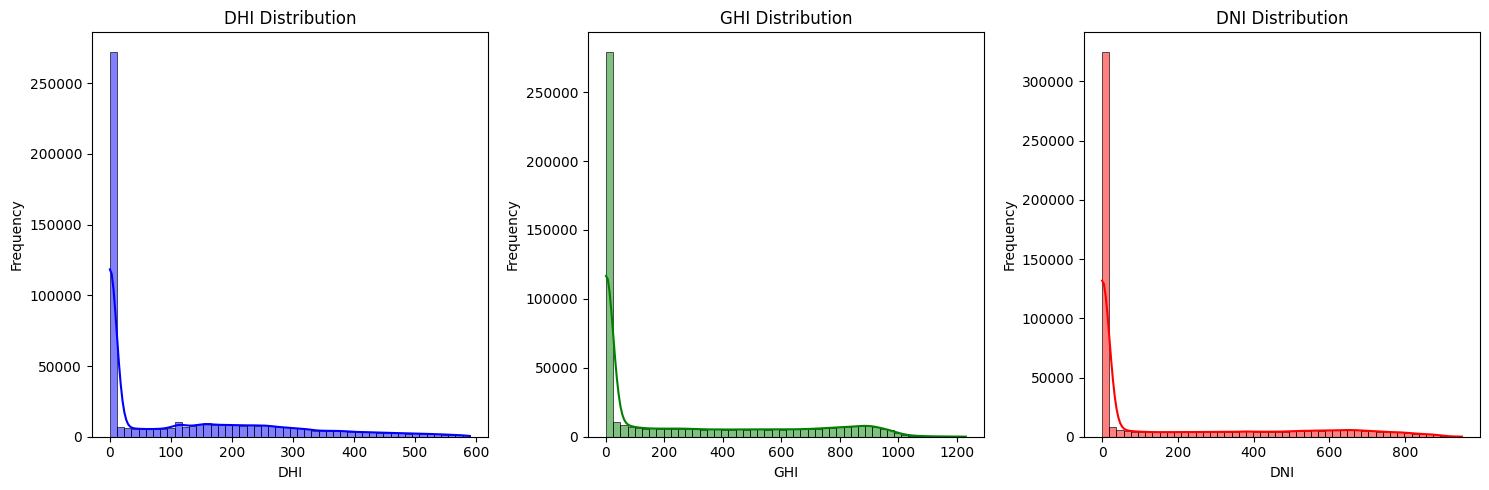

In [81]:
# Plot histograms for DHI, GHI, and DNI
plt.figure(figsize=(15, 5))

# DHI histogram
plt.subplot(1, 3, 1)
sns.histplot(df['DHI'], bins=50, kde=True, color='blue')
plt.title('DHI Distribution')
plt.xlabel('DHI')
plt.ylabel('Frequency')

# GHI histogram
plt.subplot(1, 3, 2)
sns.histplot(df['GHI'], bins=50, kde=True, color='green')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# DNI histogram
plt.subplot(1, 3, 3)
sns.histplot(df['DNI'], bins=50, kde=True, color='red')
plt.title('DNI Distribution')
plt.xlabel('DNI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

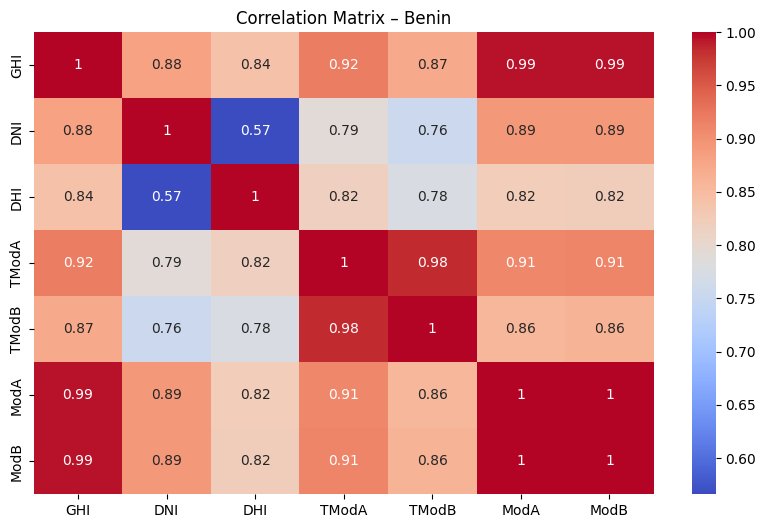

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix – Benin")
plt.show()

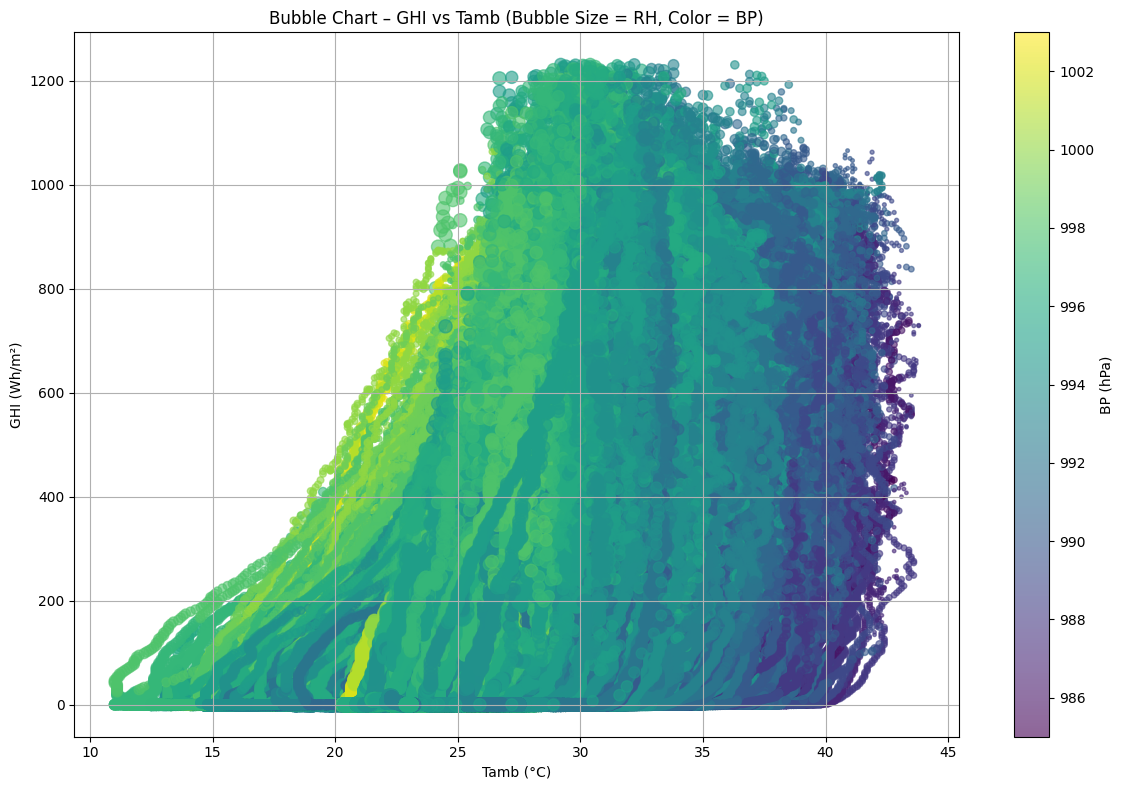

In [83]:
plt.figure(figsize=(12, 8))

# Create the bubble chart
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.6, c=df['BP'], cmap='viridis')

# Add labels and title
plt.title("Bubble Chart – GHI vs Tamb (Bubble Size = RH, Color = BP)")
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (Wh/m²)")
plt.colorbar(label="BP (hPa)")  # Color bar for BP
plt.grid(True)

plt.tight_layout()
plt.show()

In [84]:
# Calculate mean and median for DHI, GHI, and DNI
statistics = {
    "DHI": {"mean": df["DHI"].mean(), "median": df["DHI"].median()},
    "GHI": {"mean": df["GHI"].mean(), "median": df["GHI"].median()},
    "DNI": {"mean": df["DNI"].mean(), "median": df["DNI"].median()},
}

# Print the results
for key, value in statistics.items():
    print(f"{key} - Mean: {value['mean']}, Median: {value['median']}")

DHI - Mean: 113.19764045611454, Median: 1.6
GHI - Mean: 241.78092938288512, Median: 1.8
DNI - Mean: 167.4388797141542, Median: 0.0
